In [2]:
# Base PyTorch
import torch
from torch import nn

# PyTorch Vision
from torchvision import datasets, transforms

# Viz
import matplotlib.pyplot as plt

In [6]:
# Download datasets
train_dataset = datasets.FashionMNIST(root='data',
                                download=True,
                                train=True,
                                transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='data',
                                     download=True,
                                     train=False,
                                     transform=transforms.ToTensor())

CHW-format w/ img dimensionality in train dataset:  torch.Size([1, 28, 28])


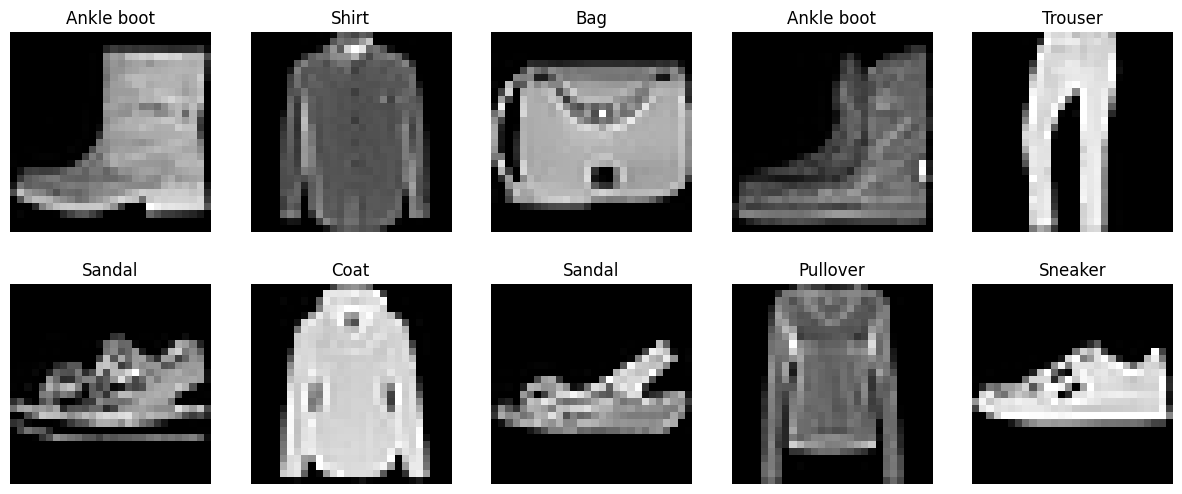

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.0172, -0.0050,  0.0275,  ..., -0.0328, -0.0198, -0.0060],
                      [-0.0241,  0.0349, -0.0072,  ..., -0.0052, -0.0173, -0.0047],
                      [-0.0304,  0.0081,  0.0005,  ..., -0.0078,  0.0322,  0.0322],
                      ...,
                      [-0.0126, -0.0007, -0.0116,  ...,  0.0229,  0.0231, -0.0269],
                      [ 0.0192, -0.0244, -0.0330,  ...,  0.0245,  0.0143,  0.0181],
                      [ 0.0107, -0.0141,  0.0285,  ...,  0.0339,  0.0147, -0.0304]],
                     device='cuda:0')),
             ('layer_stack.0.bias',
              tensor([-1.8899e-02, -2.9557e-03, -1.8481e-02, -3.1352e-02,  1.0393e-02,
                       2.9328e-02,  7.0543e-03, -4.0150e-03,  3.5635e-02, -1.4162e-02,
                      -2.2133e-02, -5.1215e-03, -2.4719e-02, -3.9738e-04, -3.5351e-02,
                      -3.3005e-02, -2.7573e-03,  2.1939e-02,  3.9803e-03, -3.4279e-02,
      

In [72]:
print("CHW-format w/ img dimensionality in train dataset: ", train_dataset[0][0].shape) if train_dataset[0][0].shape[0] == 1 else print("HWC-format w/ img dimensionality in train dataset: ", train_dataset[0][0].shape)

classes = train_dataset.classes
torch.manual_seed(42)
## Using CoPilot to visualize the dataset
# Generate some random images from the training dataset and label them using classes
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(2):
    for j in range(5):
        idx = torch.randint(len(train_dataset), size=(1,)).item()
        img, label = train_dataset[idx]
        ax[i, j].imshow(img.squeeze(), cmap='gray')
        ax[i, j].set_title(classes[label])
        ax[i, j].axis('off')
plt.show()
### End of CoPilot

# Dataloader : making batches of data, much more computational efficient
BATCH_SIZE = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=BATCH_SIZE,
                                                shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=BATCH_SIZE,
                                                shuffle=False)

# Build a baseline model

# Since this is a CNN problem, we will create a flatten layer
f = nn.Flatten()

class modelV0(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super().__init__()
        self.layer_stack = nn.Sequential(
            # Probably start with 2 layers
            nn.Linear(input_size,hidden_size),
            nn.ReLU(),  # Activation function
            nn.Linear(hidden_size,output_size),
            nn.Softmax(dim=1)   # Output activation
        )
    def forward(self,x):
        return self.layer_stack(x)

# Predetermined hyperparameters : flattened size, neurons, outputs
model = modelV0(f(next(iter(train_loader))[0]).shape[1], 128, len(classes)).to('cuda')

# Train loop
model.state_dict()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
# Probably use accuracy and f1 score as metrics

# Training viz and geeky metrics
from timeit import default_timer as timer
from tqdm.auto import tqdm

st = timer()
epochs = 10


print("Time it took:", (st-timer()))
